In [6]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [7]:
penguins = sns.load_dataset("penguins")

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##### Test/train split

In [9]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


##### DecisionTreeClassifier

In [10]:
values = {'island' : 'Unknown', 'bill_length_mm' : penguins['bill_length_mm'].mean(), 'bill_depth_mm' : penguins['bill_depth_mm'].mean(), 
          'flipper_length_mm' : penguins['flipper_length_mm'].mean(), 'body_mass_g' : penguins['body_mass_g'].mean(), 'sex' : 'Unknown'}
newPenguins = penguins.fillna(value=values)
newPenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Unknown
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [11]:
newPenguins_train, newPenguins_test = train_test_split(newPenguins, test_size=0.3, stratify=newPenguins['species'], random_state=42)

features= ['body_mass_g']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(newPenguins_train[features], newPenguins_train['species'])

DecisionTreeClassifier(max_depth=3)

##### Evaluating

In [12]:
predictions = dt.predict(newPenguins[features])

In [13]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [14]:
predictionsOnTrainset = dt.predict(newPenguins_train[features])
predictionsOnTestset = dt.predict(newPenguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, newPenguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, newPenguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7208333333333333
Accuracy on test set 0.75


##### Plot Tree

In [15]:
features= ['body_mass_g']
dtTwo = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dtTwo.fit(newPenguins[features], newPenguins['species'])

DecisionTreeClassifier(max_depth=3)

In [16]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

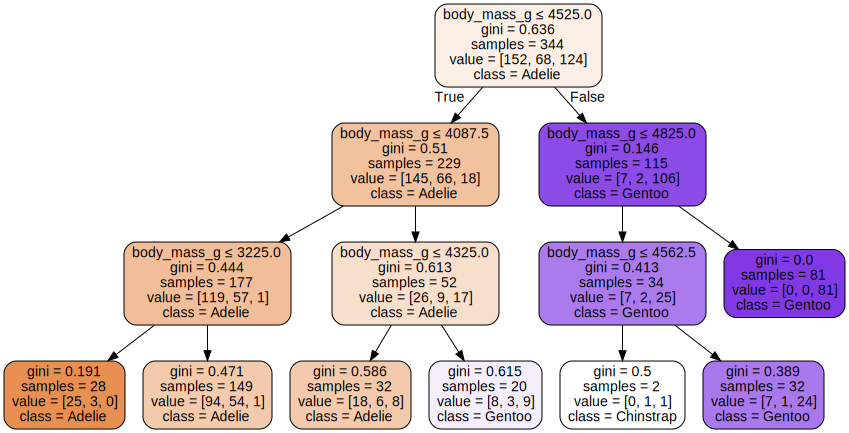

In [17]:
plot_tree_classification(dtTwo, features, newPenguins.species.unique())